# 1. Load a dataset

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/curcumin/main/PubChem_compound_list.csv')
data.head()

,cmpdname,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,isosmiles,exactmass,monoisotopicmass,xlogp
0,1-Aminopropan-2-ol,75.11,46.2,5,2,2,1,CC(CN)O,75.0684,75.0684,-1.0
1,"1-Chloro-2,4-dinitrobenzene",202.55,91.6,13,0,4,0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,201.9780,201.9780,2.3
2,"1,2-Dichloroethane",98.96,0.0,4,0,0,1,C(CCl)Cl,97.9690,97.9690,1.5
3,"1,2,4-Trichlorobenzene",181.40,0.0,9,0,0,0,C1=CC(=C(C=C1Cl)Cl)Cl,179.9300,179.9300,4.0
4,"2,3-Dihydroxybenzoic acid",154.12,77.8,11,3,4,1,C1=CC(=C(C(=C1)O)O)C(=O)O,154.0270,154.0270,1.2


# 2. Clean the data

In [ ]:
# to see missing values
data.isnull().sum()

cmpdname              0
mw                    0
polararea             0
heavycnt              0
hbonddonor            0
hbondacc              0
rotbonds              0
isosmiles             0
exactmass             0
monoisotopicmass      0
xlogp               341
dtype: int64

In [ ]:
numerical_data = data.drop(['cmpdname', 'isosmiles', 'mw', 'exactmass', 'monoisotopicmass' ],axis =1)

In [ ]:
data_no_mv = numerical_data.dropna(axis=0)

In [ ]:
data_no_mv.isnull().sum()

polararea     0
heavycnt      0
hbonddonor    0
hbondacc      0
rotbonds      0
xlogp         0
dtype: int64

In [ ]:
data_no_mv.describe(include='all')

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
count,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000
mean,75.663915,49.295525,0.619901,5.295571,35.531963,14.961718
std,44.287087,24.773641,1.659651,2.621649,24.298595,10.438526
min,0.000000,1.000000,0.000000,0.000000,0.000000,-21.400000
25%,61.800000,21.000000,0.000000,5.000000,5.000000,3.100000
50%,78.900000,63.000000,0.000000,6.000000,50.000000,20.200000
75%,78.900000,69.000000,0.000000,6.000000,55.000000,23.200000
max,873.000000,125.000000,29.000000,52.000000,74.000000,34.900000


In [ ]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21697 entries, 0 to 22037
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   polararea   21697 non-null  float64
 1   heavycnt    21697 non-null  int64  
 2   hbonddonor  21697 non-null  int64  
 3   hbondacc    21697 non-null  int64  
 4   rotbonds    21697 non-null  int64  
 5   xlogp       21697 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


In [ ]:
data_no_mv.columns
cols = ['xlogp', 'polararea', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds']

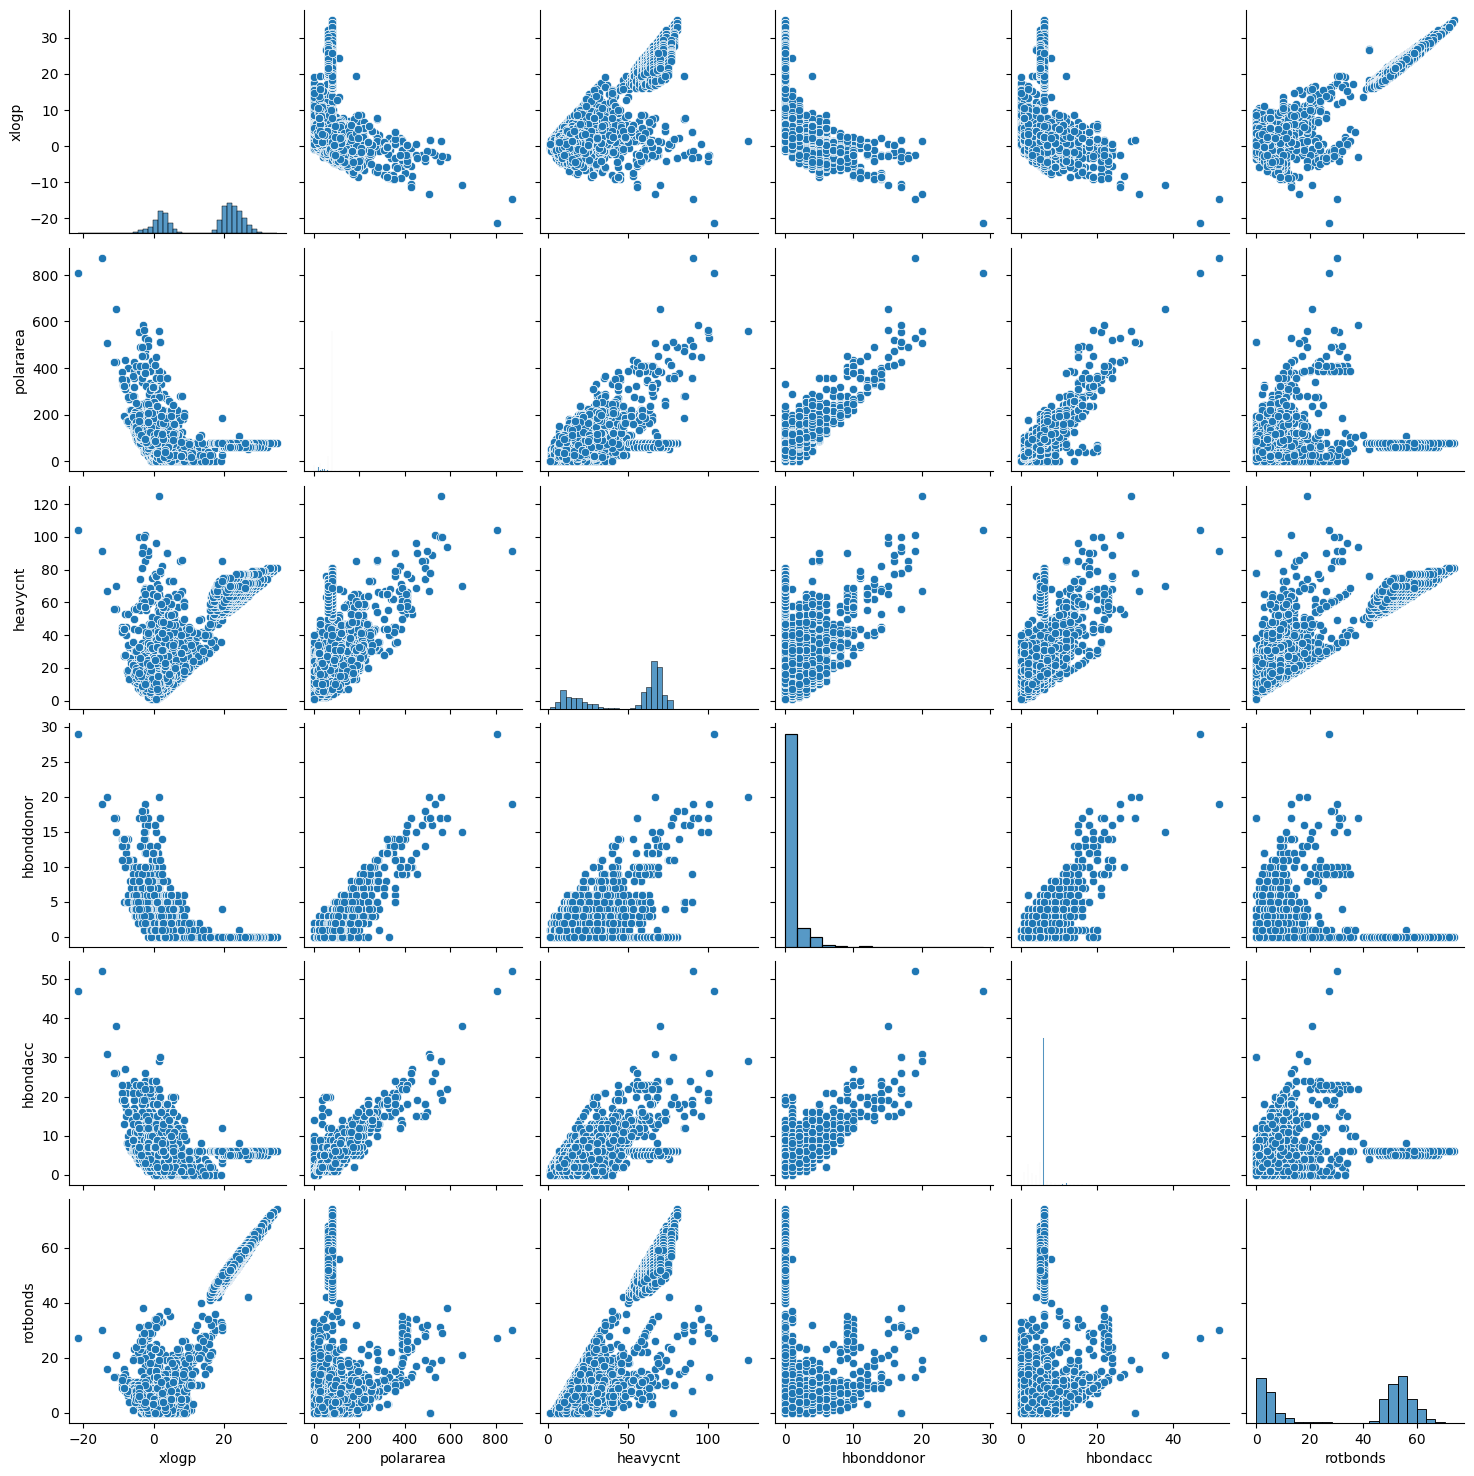

In [ ]:
import seaborn as sns

sns.pairplot(data_no_mv[cols])

In [ ]:
data_no_mv.corr()

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
polararea,1.000000,0.298413,0.740235,0.888785,0.097491,-0.032019
heavycnt,0.298413,1.000000,-0.271199,0.543949,0.952388,0.922000
hbonddonor,0.740235,-0.271199,1.000000,0.489584,-0.441135,-0.542695
hbondacc,0.888785,0.543949,0.489584,1.000000,0.345328,0.240429
rotbonds,0.097491,0.952388,-0.441135,0.345328,1.000000,0.979181
xlogp,-0.032019,0.922000,-0.542695,0.240429,0.979181,1.000000


#3. Plot correlation matrix

In [ ]:

df_new = data.drop(['xlogp','exactmass', 'monoisotopicmass'],axis=1)
df_new


,cmpdname,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,isosmiles
0,1-Aminopropan-2-ol,75.11,46.2,5,2,2,1,CC(CN)O
1,"1-Chloro-2,4-dinitrobenzene",202.55,91.6,13,0,4,0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl
2,"1,2-Dichloroethane",98.96,0.0,4,0,0,1,C(CCl)Cl
3,"1,2,4-Trichlorobenzene",181.40,0.0,9,0,0,0,C1=CC(=C(C=C1Cl)Cl)Cl
4,"2,3-Dihydroxybenzoic acid",154.12,77.8,11,3,4,1,C1=CC(=C(C(=C1)O)O)C(=O)O
...,...,...,...,...,...,...,...,...
22033,"2-[(4R,5S,7R,9R,11E,13Z,16R)-6-[(2S,3R,4R,5S,6...",843.10,195.0,59,4,16,11,C[C@@H]1C/C=C\C=C\C([C@@H](C[C@@H](C([C@H]([C@...
22034,"sodium;(E,3R,5S)-3,5-dihydroxy-7-[2-[methyl(me...",507.50,152.0,34,2,10,10,[2H]C1=C(C(=C(C(=C1C2=C(C(=NC(=N2)N(C)S(=O)(=O...
22035,"(2E)-5-[(1S,7S,8S,9R)-7-acetyloxy-4-methoxycar...",432.50,116.0,31,1,8,7,C/C(=C\C=C[C@@]1([C@@H]2CC[C@]3([C@@]2(CCC(=CC...
22036,"(1R,4S,6S,7E,15R,17R)-N-cyclopropylsulfonyl-17...",749.90,194.0,52,2,10,8,CC1=C(C=CC2=C1N=C(C=C2O[C@@H]3C[C@@H]4[C@@H](C...


<ipython-input-13-a033678e0e13>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr()


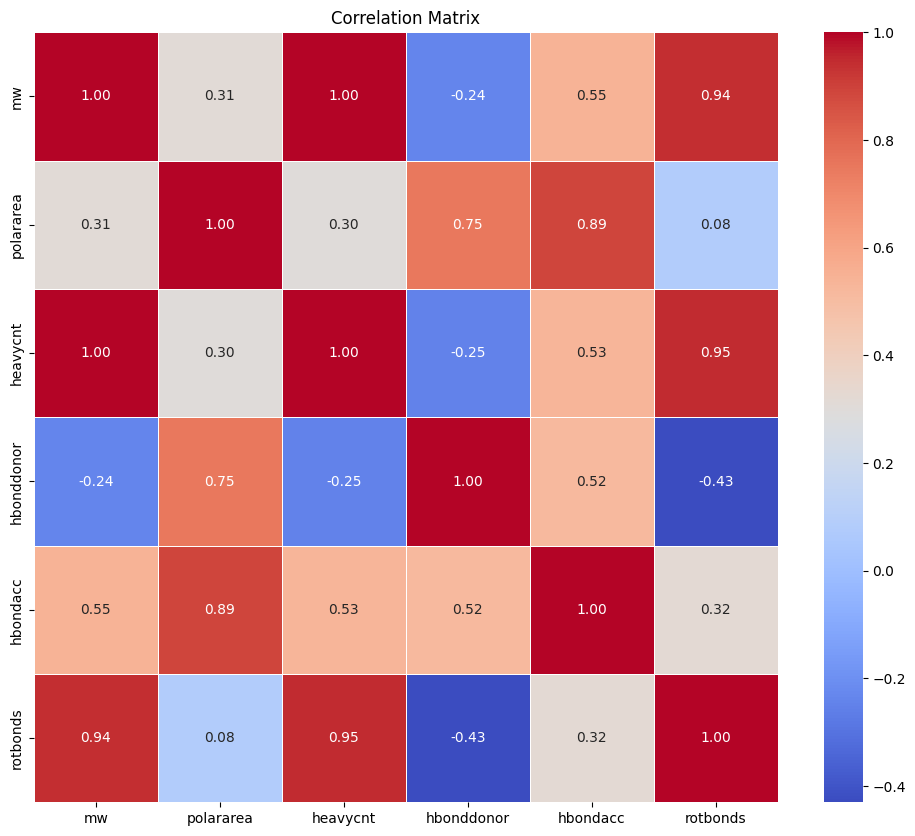

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_new.corr()

# Create the correlation matrix plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

<ipython-input-14-659dc3d8dfeb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr());


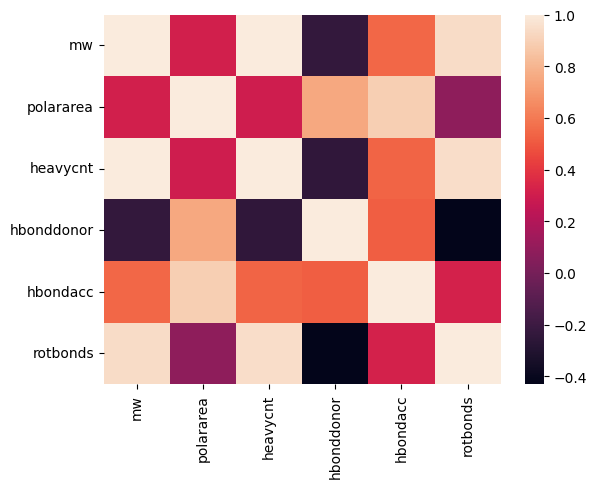

In [ ]:
import seaborn as sns

sns.heatmap(df_new.corr());

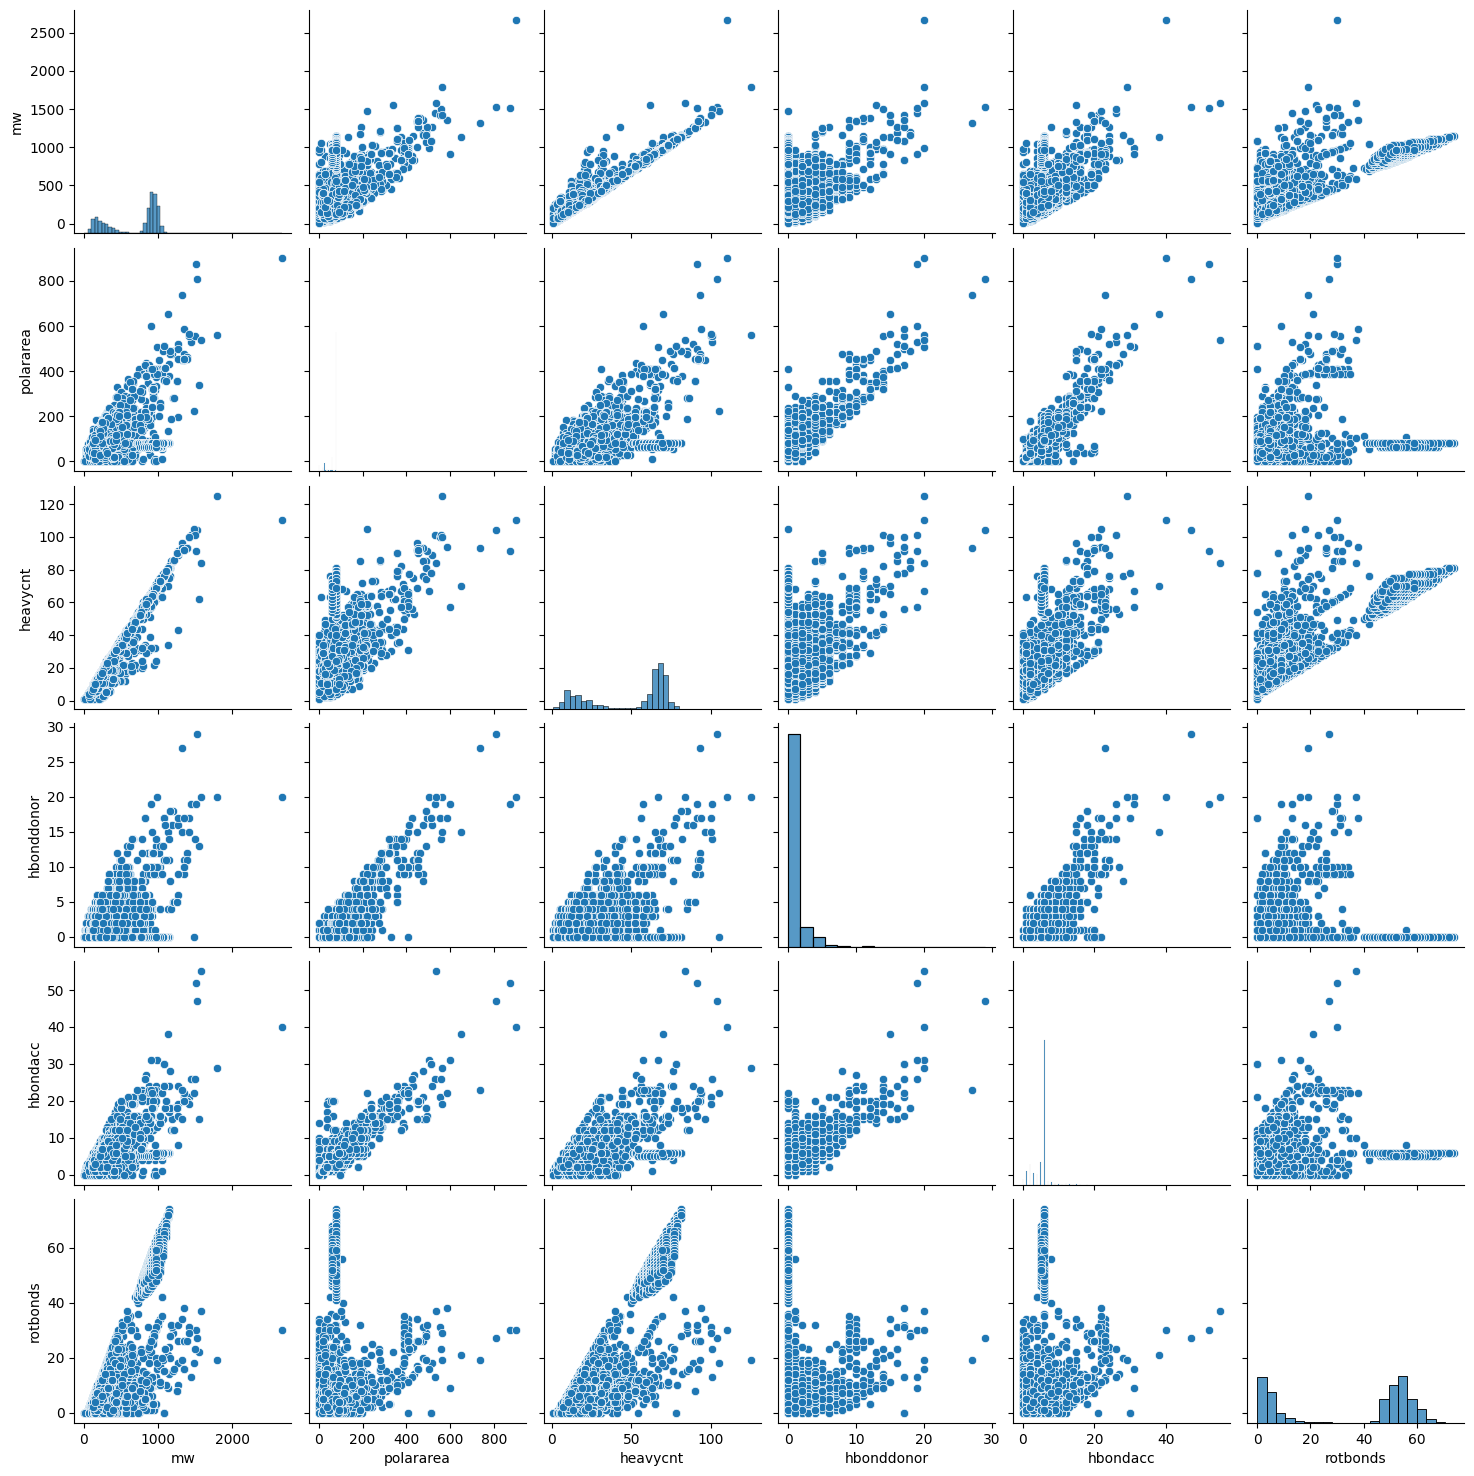

In [ ]:
sns.pairplot(df_new);

# 4. Run the regression

In [ ]:
y = data_no_mv['xlogp']
X = data_no_mv.drop('xlogp', axis = 1)

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [ ]:
# Predicting a new result
y_pred = regressor.predict(X)

In [ ]:
# Tampilkan nilai-nilai yang bersifat string
string_values = [val for val in X if isinstance(val, str)]
print("String values in X:", string_values)


String values in X: ['polararea', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds']


# 5. Display the evaluation metrics


Mean Squared Error (MSE): 0.6458490025404368
Mean Absolute Error (MAE): 0.36057249829495674
R-squared (R2) Score: 0.9940108809283581
Explained Variance Score: 0.9940118047511014



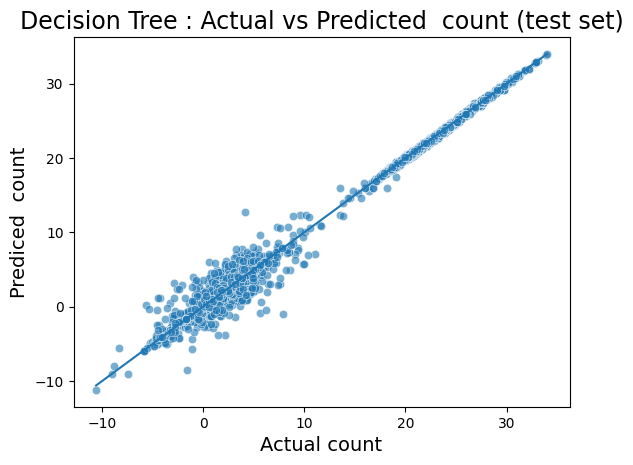

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import seaborn as sns

# Decision Tree Regression
regressor = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

# Visualize the results (scatter plot)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)
plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Decision Tree : Actual vs Predicted  count (test set)', fontsize=17)
plt.show()


# 6. Default parameter

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create instances of the regression models and feature transformation
decision_tree = DecisionTreeRegressor()

# Get default hyperparameters

default_decision_tree_params = decision_tree.get_params()


# Print the default hyperparameters

print("\nDefault Hyperparameters for Decision Tree Regression:")
print(default_decision_tree_params)



Default Hyperparameters for Decision Tree Regression:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


#7. Feature selection ANOVA and Recursive Feature Elimination (RFE)

## ANOVA

In [ ]:

%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
data_no_mv.head()

,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,xlogp
0,46.2,5,2,2,1,-1.0
1,91.6,13,0,4,0,2.3
2,0.0,4,0,0,1,1.5
3,0.0,9,0,0,0,4.0
4,77.8,11,3,4,1,1.2


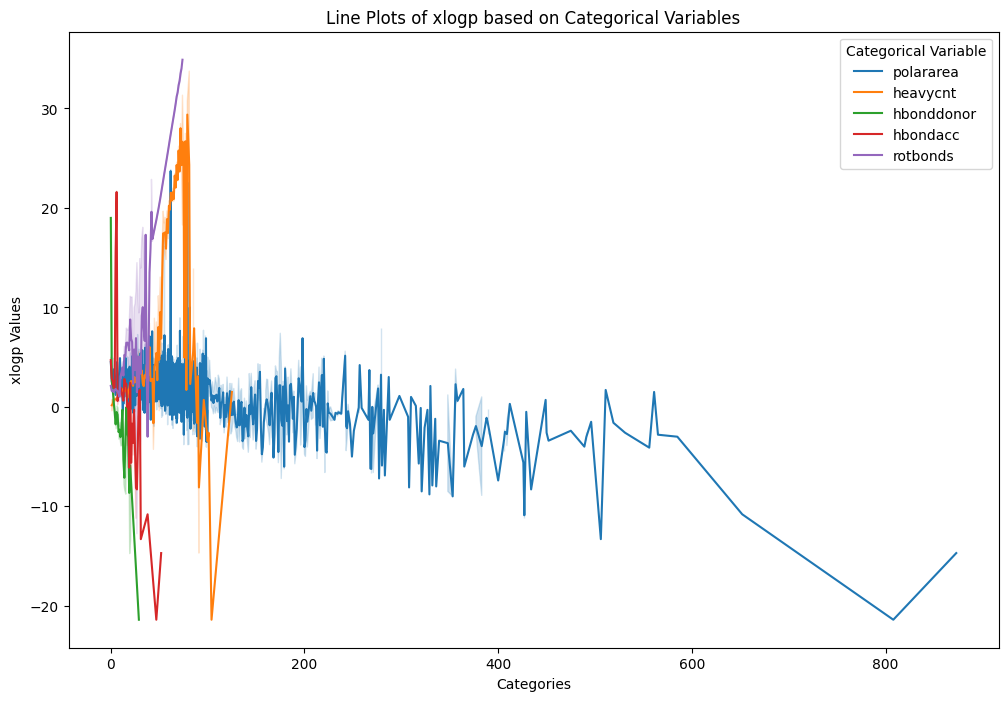

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_no_mv' is your DataFrame
plt.figure(figsize=(12, 8))

# Line plot for polararea
sns.lineplot(x='polararea', y='xlogp', data=data_no_mv, label='polararea')

# Line plot for heavycnt
sns.lineplot(x='heavycnt', y='xlogp', data=data_no_mv, label='heavycnt')

# Line plot for hbonddonor
sns.lineplot(x='hbonddonor', y='xlogp', data=data_no_mv, label='hbonddonor')

# Line plot for hbondacc
sns.lineplot(x='hbondacc', y='xlogp', data=data_no_mv, label='hbondacc')

# Line plot for rotbonds
sns.lineplot(x='rotbonds', y='xlogp', data=data_no_mv, label='rotbonds')

plt.title('Line Plots of xlogp based on Categorical Variables')
plt.xlabel('Categories')
plt.ylabel('xlogp Values')
plt.legend(title='Categorical Variable')
plt.show()


In [ ]:
model = ols('xlogp ~ polararea + heavycnt + hbonddonor + hbondacc + rotbonds', data=data).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
polararea,5503.341292,1.0,2576.489323,0.000000e+00
heavycnt,9115.426457,1.0,4267.552691,0.000000e+00
hbonddonor,408.779287,1.0,191.377458,2.431228e-43
hbondacc,1.660539,1.0,0.777412,3.779437e-01
rotbonds,54104.362396,1.0,25329.941329,0.000000e+00
Residual,46331.640074,21691.0,NaN,NaN


In ANOVA analysis, the most important or significant parameters are typically identified by the values of F and p (PR(>F)). The higher the F value and the lower the p value, the more significant the influence. In this case: The variables **rotbonds, heavycnt, and polararea** have high F values and very low p values, indicating that these three variables have a significant influence in explaining variability in the data. These values suggest that there is a significant difference between the tested groups for these variables.


In [ ]:
# Run the regression

data_new = data_no_mv.drop(['hbondacc', 'hbonddonor' ],axis =1)

In [ ]:
y_new = data_new['xlogp']
X_new = data_new.drop('xlogp', axis = 1)

Mean Squared Error (MSE): 0.7665452530366852
Mean Absolute Error (MAE): 0.3874302572944889
R-squared (R2) Score: 0.9928916344591688
Explained Variance Score: 0.9928982377489654



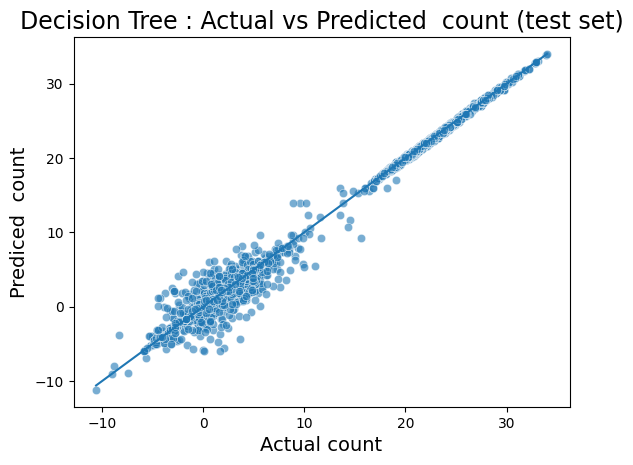

In [ ]:
# Decision Tree Regression
regressor = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)
plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Decision Tree : Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

## Recursive Feature Elimination (RFE)

polararea selected=False rank=2
heavycnt selected=True rank=1
hbonddonor selected=True rank=1
hbondacc selected=False rank=3
rotbonds selected=True rank=1


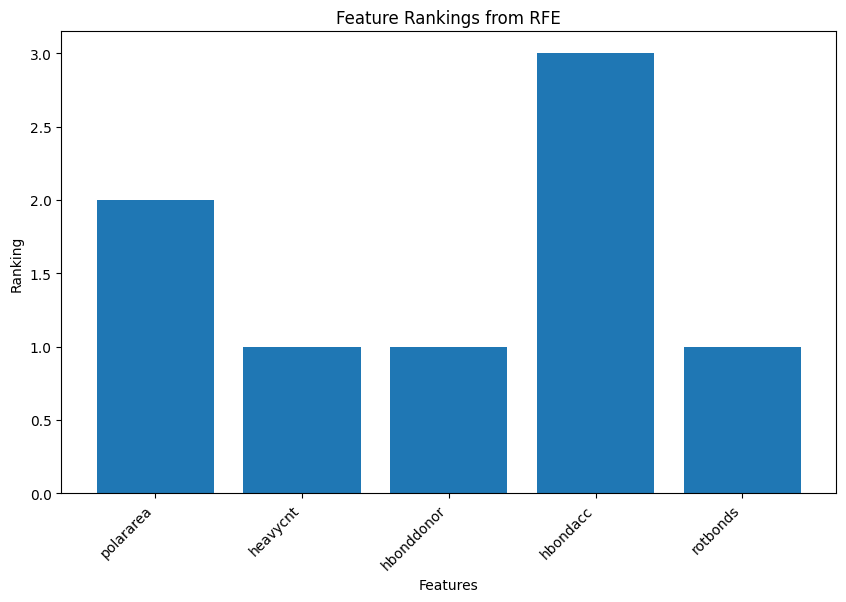

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create the RFE model with Linear Regression
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X, y)

# Print selected features and their rankings
for i, col in zip(range(len(X.columns)), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

# Plotting the bar graph for feature rankings
plt.figure(figsize=(10, 6))
plt.bar(range(len(rfe.ranking_)), rfe.ranking_)
plt.xticks(range(len(X.columns)), X.columns, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Rankings from RFE')
plt.show()


In the realm of Recursive Feature Elimination (RFE) analysis, the significance of features is gauged through their respective rankings. A lower rank denotes higher importance for predicting model outcomes. In this RFE exploration, **polararea,heavycnt, and rotbonds** all share the coveted rank of 1, underscoring their paramount importance in shaping the model's predictive prowess.

In [ ]:
# Run the regression

data_new = data_no_mv.drop(['hbondacc', 'polararea' ],axis =1)

In [ ]:
y_new1 = data_new['xlogp']
X_new1 = data_new.drop('xlogp', axis = 1)

Mean Squared Error (MSE): 1.1708255387046882
Mean Absolute Error (MAE): 0.4873791068341674
R-squared (R2) Score: 0.9891426424197618
Explained Variance Score: 0.989142646477135



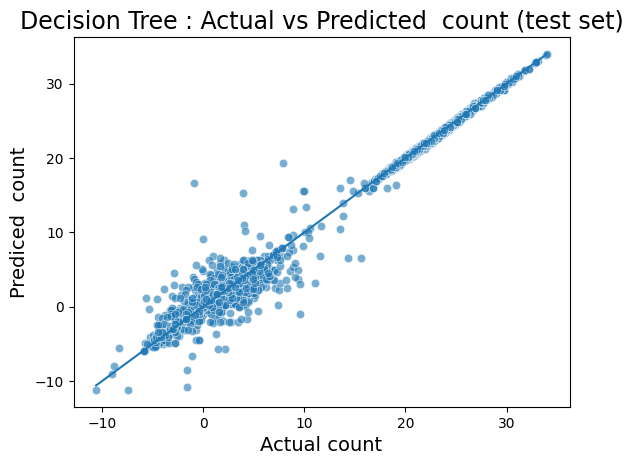

In [ ]:
# Decision Tree Regression
regressor = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X_new1, y_new1, test_size=0.2, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)
plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Decision Tree : Actual vs Predicted  count (test set)', fontsize=17)
plt.show()